# Project 1: Mining information from Text Data 
<hr>

## Task 3: Graphs and Social Networks

Using the whole anthologies abstract dataset.

1. From the abstracts part, using two different similarity thresholds (e.g. 0.05, 0.1), create an unweighted network from the obtained similar pairs (use MinHashing or LSH) for each threshold.

2. From the basket list of authors/editors, using A-Priori or PCY, create a weighted network, using the support threshold as weight.

3. Find the communities for the networks obtained in 1. and 2. Comment about the results with respect to the different thresholds and methods. How does it compare with the same analysis using 1-NN done in previous tasks?

4. Use a ready-made software, library or service (eg. gephi) for visualizing one the network in 1. or 2.

<hr>

### 1. From the abstracts part, using two different similarity thresholds (e.g. 0.05, 0.1), create an unweighted network from the obtained similar pairs (use MinHashing or LSH) for each threshold.

<hr>

### 2. From the basket list of authors/editors, using A-Priori or PCY, create a weighted network, using the support threshold as weight.


In [23]:
def get_entities(filename):
    if(not os.path.exists(filename)):
        print("File not found")
        return

    network = []

    file = open(filename, encoding='latin1')

    with open(filename, 'r' , errors='ignore') as f:        
        for line in f:
            line = line.replace("frozenset({", '')
            line = line.replace(", ", '  ')
            line = line.replace("'", '')
            line = line.replace("})", '  ')
            line = line.replace('"', '')
            line = line.replace("\n", '')
            line =re.split(r'\s{2,}', line)
            network.append(line)
    return network                   

Utiyama Masao Sumita Eiichiro 90
Negri Matteo Turchi Marco 71
Ekbal Asif Bhattacharyya Pushpak 65
Che Wanxiang Liu Ting 77
Zhao Jun Liu Kang 75
Osenova Petya Simov Kiril 51
Wang Haifeng Wu Hua 68
Zhou Ming Wei Furu 51
Sun Maosong Liu Zhiyuan 70
Waibel Alex Niehues Jan 50
Kurohashi Sadao Kawahara Daisuke 71
Li Haizhou Zhang Min 60


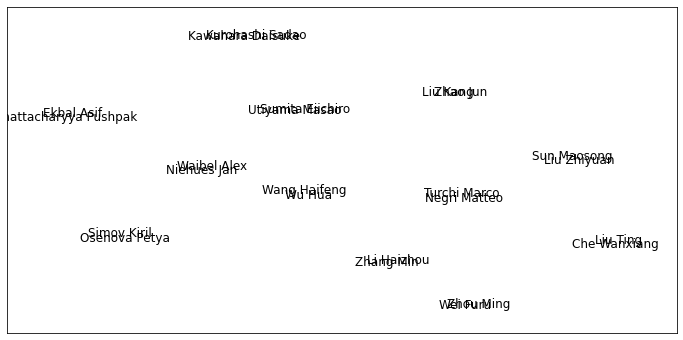

In [33]:
import networkx as nx
from itertools import combinations
from random import randint  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

data = get_entities("authors_out50.txt")

authors = []
for a1, a2, w in data:
    if a1 not in authors:
        authors.append(a1)
    if a2 not in authors:
        authors.append(a2)

G = nx.Graph()
#nodes = authors
for a in authors:
    G.add_node(a)
for n1, n2, w in data:
    print(n1, n2, w)
    G.add_edge(n1, n2, weight=w)

nx.draw_networkx(G, node_color='w')

In [ ]:
def get_relations(network):
    # in our case, relations are bigrams in sentences
    bigrams = []
    for sent in network:
        for i in range(len(sent)-1):
            # for every word and the next in the sentence
            pair = [sent[i], sent[i+1]]
            # only add unique bigrams
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams

In [ ]:
def get_entities(document):
    # In our case, entities are all unique authors
    unique_authors = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get graph edges
    edges = get_relations(pdoc)
    
    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

<hr>

#### 3. Find the communities for the networks obtained in 1. and 2. Comment about the results with respect to the different thresholds and methods. How does it compare with the same analysis using 1-NN done in previous tasks?